In [119]:
#Neural Network from scratch, predict values through gradient descent
import numpy as np
import matplotlib.pyplot as plt

In [120]:
num_inputs = 2
num_hidden = 5
num_output = 1

#weights randomise
Why = np.random.randn(num_hidden,num_output) #(5,1)
Wxh = np.random.randn(num_inputs,num_hidden) #(2,5)

#bias randomise
bx = np.zeros((1,num_hidden)) #(1,5)
by = np.zeros((1,num_output)) #(1,1)

#input data (XOR)
X = np.array([[0,1],[1,0],[1,1],[0,0]]) #(4,2)
y = np.array([[1],[1],[0],[0]]) #(4,1)

X.shape

(4, 2)

In [121]:
Wxh.shape

(2, 5)

In [122]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_derivative(z):
    return np.exp(z)/((1+np.exp(z))**2)

def forward_prop(x,Wxh,Why):
    z1 = np.dot(x,Wxh) + bx
    a1 = sigmoid(z1)
    z2 = np.dot(a1,Why) + by
    y_hat = sigmoid(z2)
    return z1,a1,z2,y_hat

def backword_prop(y_hat, z1, a1, z2):
    # dJ/d_Wxh = dJ/dy_hat . dy_hat/d_z2 . d_z2/dWyh
    # dj_dWxh = (y-y_hat)*sigmoid_derivative(z2)*a1
    delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    
    # dJ/d_Wyh = dJ/dy_hat . dy_hat/d_z2 . d_z2/d_a1 . d_a1/d_z1 . dz1/dWxh
    # dj_dWhy = (y-y_hat)*sigmoid_derivative(z2)*W_hy*sigmoid_derivative(z1)*X
    delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(X.T, delta1) 

    return dJ_dWxh, dJ_dWhy
'''
    
MAJOR CULPRIT FOR ERROR
-----------------------------
    delta1 = np.multiply(delta2,Why.T)
    dj_dWhy = np.dot(X.T,delta1*sigmoid_derivative(z2))
-----------------------------

'''

def cost_function(y,y_hat):
    J = 0.5*sum((y-y_hat)**2) #there are only two different weights so n=2
    return J
    


In [123]:
alpha = 0.01 #learning-rate
num_iterations = 500000 #number of times the weights are changed

In [124]:
cost = []
for i in range(num_iterations):
    
    #perform forward propagation and predict output
    z1,a1,z2,y_hat = forward_prop(X,Wxh,Why)
    
    #perform backward propagation and calculate gradients
    dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)
        
    #update the weights
    Wxh -= alpha * dJ_dWxh
    Why -= alpha * dJ_dWhy
    
    #compute cost
    c = cost_function(y, y_hat)
    
    #store the cost
    cost.append(c)
    

Text(0, 0.5, 'Cost')

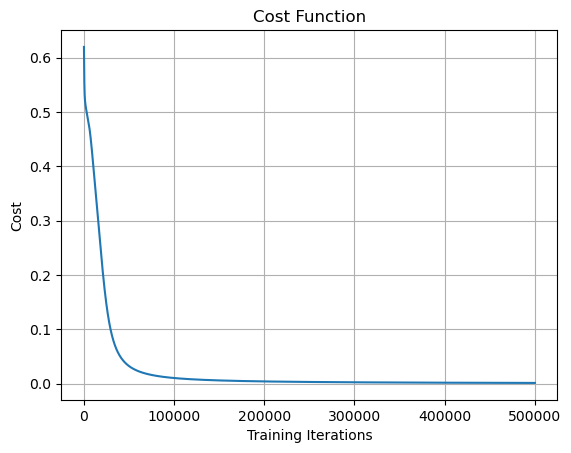

In [125]:
plt.grid()
plt.plot(range(num_iterations),cost)


plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')